# Librairies

In [ ]:
%pip install ydata-profiling loguru mlflow missingno imbalanced-learn xgboost dill imblearn pendulum ucimlrepo yellowbrick plotly xgboost lightgbm tabulate shap

In [ ]:
# Standard Libraries
import os
import tempfile
import shutil
import time
import warnings
from pathlib import Path
from time import perf_counter

# Third-party Libraries
import dill
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd
import pendulum
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from category_encoders import CountEncoder
from imblearn.pipeline import Pipeline as imb_Pipeline
from loguru import logger
from sklearn import set_config
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.dummy import DummyClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, classification_report,
    confusion_matrix, f1_score, precision_score, recall_score,
    roc_auc_score, ConfusionMatrixDisplay, PrecisionRecallDisplay,
    RocCurveDisplay
)
from sklearn.model_selection import (
    GridSearchCV, StratifiedKFold, train_test_split
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (
    FunctionTransformer, MinMaxScaler, OneHotEncoder, OrdinalEncoder,
    RobustScaler, StandardScaler
)
from sklearn.svm import SVC
from sklearn.utils.validation import check_is_fitted
from tabulate import tabulate
from ucimlrepo import fetch_ucirepo, list_available_datasets
from xgboost import XGBClassifier
import xgboost as xgb
from yellowbrick.classifier import DiscriminationThreshold

# Configuration
warnings.filterwarnings('ignore')
set_config(display='diagram')
pd.set_option("display.max_columns", None)

# Visualisation
from ydata_profiling import ProfileReport
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn.covariance import EllipticEnvelope 

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.ensemble import (
    RandomForestClassifier, AdaBoostClassifier, BaggingClassifier,
    ExtraTreesClassifier, StackingClassifier, VotingClassifier
)
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import (
    balanced_accuracy_score, f1_score, roc_auc_score
)
from tabulate import tabulate

# Importation de la base

In [2]:
base = pd.read_csv("BASES/telecom_customer_churn.csv", sep=",")
zipcode=pd.read_csv("BASES/telecom_zipcode_population.csv", sep=",")
metadata=pd.read_csv("BASES/telecom_data_dictionary.csv", encoding='latin-1')

In [14]:
metadata

,Table,Field,Description
0,Customer Churn,CustomerID,A unique ID that identifies each customer
1,Customer Churn,Gender,"The customers gender: Male, Female"
2,Customer Churn,Age,"The customers current age, in years, at the t..."
3,Customer Churn,Married,"Indicates if the customer is married: Yes, No"
4,Customer Churn,Number of Dependents,Indicates the number of dependents that live w...
5,Customer Churn,City,The city of the customers primary residence i...
6,Customer Churn,Zip Code,The zip code of the customers primary residence
7,Customer Churn,Latitude,The latitude of the customers primary residence
8,Customer Churn,Longitude,The longitude of the customers primary residence
9,Customer Churn,Number of Referrals,Indicates the number of times the customer has...


In [ ]:
base.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [6]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              3166 non-null   objec

Nous crééons un dcitionnaire contenant les proportions de churn par modalités de chaque variable catégorielle, afin de mieux cibler les déterminants du churn

In [4]:
import pandas as pd

# 1. Imputation des valeurs manquantes
# Variables où les NA doivent être remplacés par "NoInternet"
internet_related_vars = [
    'Online Security', 'Online Backup', 'Device Protection Plan',
    'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
    'Streaming Music', 'Unlimited Data', 'Internet Type'
]

for var in internet_related_vars:
    if var in base.columns:
        base[var].fillna('NoInternet', inplace=True)

# Imputation pour 'Offer'
if 'Offer' in base.columns:
    base['Offer'].fillna('No', inplace=True)

# Imputation pour 'Multiple Lines'
if 'Multiple Lines' in base.columns:
    base['Multiple Lines'].fillna('NoPhone', inplace=True)

# 2. Calcul des proportions de churn pour chaque variable qualitative
# D'abord, identifions les variables qualitatives
quali_vars = base.select_dtypes(include=['object']).columns.tolist()

# Supprimons les variables qui ne sont pas pertinentes (comme ID ou les raisons de churn)
non_relevant_vars = ['Customer ID', 'Churn Category', 'Churn Reason']
quali_vars = [var for var in quali_vars if var not in non_relevant_vars]

# Créons un dictionnaire pour stocker les résultats
churn_proportions = {}

# Calculons la proportion de churn pour chaque modalité de chaque variable
for var in quali_vars:
    # Créer un tableau croisé entre la variable et le statut de churn
    cross_tab = pd.crosstab(base[var], base['Customer Status'], normalize='index') * 100
    
    # Si 'Churn' est une des colonnes (sinon, cela signifie qu'il n'y a pas de churn dans les données)
    if 'Churned' in cross_tab.columns:
        # Stocker les proportions de churn dans le dictionnaire
        churn_proportions[var] = cross_tab['Churned'].to_dict()
    elif 'Churn' in cross_tab.columns:  # au cas où le nom serait légèrement différent
        churn_proportions[var] = cross_tab['Churn'].to_dict()

# Afficher le dictionnaire résultant
churn_proportions



{'Gender': {'Female': 26.920871559633024, 'Male': 26.160337552742618},
 'Married': {'No': 32.95797857731392, 'Yes': 19.66490299823633},
 'City': {'Acampo': 75.0,
  'Acton': 0.0,
  'Adelanto': 20.0,
  'Adin': 50.0,
  'Agoura Hills': 40.0,
  'Aguanga': 25.0,
  'Ahwahnee': 25.0,
  'Alameda': 0.0,
  'Alamo': 0.0,
  'Albany': 50.0,
  'Albion': 0.0,
  'Alderpoint': 25.0,
  'Alhambra': 33.33333333333333,
  'Aliso Viejo': 0.0,
  'Alleghany': 0.0,
  'Alpaugh': 75.0,
  'Alpine': 60.0,
  'Alta': 0.0,
  'Altadena': 20.0,
  'Alturas': 0.0,
  'Alviso': 25.0,
  'Amador City': 75.0,
  'Amboy': 20.0,
  'Anaheim': 25.0,
  'Anderson': 50.0,
  'Angels Camp': 50.0,
  'Angelus Oaks': 25.0,
  'Angwin': 25.0,
  'Annapolis': 25.0,
  'Antelope': 50.0,
  'Antioch': 50.0,
  'Anza': 50.0,
  'Apple Valley': 25.0,
  'Applegate': 25.0,
  'Aptos': 25.0,
  'Arbuckle': 25.0,
  'Arcadia': 10.0,
  'Arcata': 0.0,
  'Armona': 50.0,
  'Arnold': 25.0,
  'Aromas': 25.0,
  'Arroyo Grande': 0.0,
  'Artesia': 0.0,
  'Arvin': 0.0,

L'Offer E semble problématique ou mal ciblée. 

Les contrats courts churnent 18x plus que les contrats de 2 ans. 

Les paiements par carte réduisent le churn de 60% vs chèque.

## Train test split

In [8]:
base['Customer Status'] = base['Customer Status'].replace({'Joined': 'Stayed'})
base["churn"] = base["Customer Status"].map({"Stayed": 0, "Churned": 1})
X = base.drop(columns=["Customer Status", "churn"])
y = base["churn"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [115]:
X_train

,Customer ID,Gender,Age,Married,Number of Dependents,City,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Churn Category
3793,5334-JLAXU,Female,44,Yes,0,French Camp,8,60,Offer B,Yes,15.54,Yes,Yes,Fiber Optic,19.0,Yes,Yes,No,No,No,Yes,Yes,Yes,Month-to-Month,Yes,Credit Card,94.10,5475.90,0.0,0,932.40,6408.30,NaN
3192,4573-JKNAE,Male,44,No,3,Los Angeles,0,12,Offer D,Yes,17.23,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Two Year,No,Bank Withdrawal,19.35,212.30,0.0,0,206.76,419.06,NaN
4922,6923-JHPMP,Female,35,No,0,Templeton,0,2,NaN,Yes,35.41,No,Yes,Fiber Optic,25.0,Yes,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,80.45,137.10,0.0,0,70.82,207.92,NaN
3926,5524-KHNJP,Male,35,Yes,0,Glendale,7,33,Offer C,Yes,48.85,No,Yes,Cable,30.0,Yes,No,Yes,No,Yes,Yes,Yes,Yes,One Year,No,Credit Card,74.75,2453.30,0.0,0,1612.05,4065.35,NaN
3859,5433-KYGHE,Female,53,No,1,Avila Beach,0,14,Offer D,Yes,47.72,Yes,Yes,Fiber Optic,22.0,Yes,No,No,Yes,No,No,No,Yes,Month-to-Month,Yes,Mailed Check,86.00,1164.05,0.0,0,668.08,1832.13,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6331,8966-OIQHG,Female,49,Yes,2,Stanton,8,22,NaN,Yes,45.35,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,One Year,No,Bank Withdrawal,20.75,452.35,0.0,0,997.70,1450.05,NaN
6146,8708-XPXHZ,Female,25,Yes,0,Castella,1,42,NaN,Yes,6.84,Yes,Yes,Fiber Optic,27.0,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,94.20,4186.30,0.0,0,287.28,4473.58,Competitor
4485,6331-EWIEB,Male,49,No,0,El Monte,0,20,Offer D,Yes,1.36,Yes,Yes,Fiber Optic,25.0,No,No,No,No,Yes,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,85.25,1734.50,0.0,0,27.20,1761.70,Other
2739,3896-ZVNET,Female,42,Yes,3,Gerber,7,24,NaN,Yes,20.74,Yes,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Two Year,No,Mailed Check,24.70,571.75,0.0,0,497.76,1069.51,NaN


Dossier de sauvegarde de modèles

In [51]:
EXECUTION_DATE = pendulum.now(tz="UTC")


ROOT_DIR = Path().cwd()
MODEL_DIR = Path(ROOT_DIR, "models")

MODEL_DIR.mkdir(parents=True, exist_ok=True)
logger.info(f"Model directory: {MODEL_DIR}")

2025-06-13 12:58:29.826 | INFO     | __main__:<module>:8 - Model directory: e:\ISE2_ME\SEMESTRE 2\Machine learning 2\ML2_PROJECT\MODELES\models


## Pipeline

In [232]:
# Configuration globale
set_config(transform_output="pandas")  # Pour conserver les noms de colonnes
# ========================
# Transformers 
# ========================

class ProportionChurnEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, mapping_dict):
        self.mapping_dict = mapping_dict
        
    def fit(self, X, y=None):
        self.columns_ = X.columns.tolist()
        return self
    
    def transform(self, X):
        X = X.copy()
        for col in self.columns_:
            if col in self.mapping_dict:
                # Map each value to its churn proportion
                mapping = self.mapping_dict[col]
                X[col] = X[col].map(mapping).fillna(0)  # Valeur par défaut si inconnue
            else:
                raise ValueError(f"No mapping provided for column: {col}")
        return X



class FeatureEngineer(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        required_cols = {'Multiple Lines', 'Avg Monthly GB Download', 'Total Revenue', 
                        'Tenure in Months', 'Total Refunds', 'Total Extra Data Charges',
                        'Total Long Distance Charges', 'Total Charges'}
        missing = required_cols - set(X.columns)
        if missing:
            raise ValueError(f"Colonnes requises manquantes: {missing}")
        return self
    
    def transform(self, X):
        X = X.copy()
        
        # Gestion des NA
        X['Multiple Lines'] = X['Multiple Lines'].fillna('No')
        X['Offer'] = X['Offer'].fillna('No')
        X['Avg Monthly GB Download'] = X['Avg Monthly GB Download'].fillna(0)
        
        # Calcul des ratios
        X['Monthly_revenue'] = X['Total Revenue'] / (X['Tenure in Months'] + 1e-6)  # Éviter division par zéro
        X['Monthly_revenue'].replace([np.inf, -np.inf], np.nan, inplace=True)
        
        X['Monthly_extra_charges'] = X['Total Extra Data Charges'] / (X['Tenure in Months'] + 1e-6)
        X['Monthly_extra_charges'].replace([np.inf, -np.inf], np.nan, inplace=True)
        X['Monthly_long_distance_charges']=X['Total Long Distance Charges']/(X['Tenure in Months'] + 1e-6)
        X['Monthly_long_distance_charges'].replace([np.inf, -np.inf], np.nan, inplace=True)
        
        return X

class OutlierClipper(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
        
    def fit(self, X, y=None):
        self.bounds_ = {}
        for col in self.columns:
            if col in X.columns:  # Seulement si la colonne existe
                q1 = X[col].quantile(0.25)
                q3 = X[col].quantile(0.75)
                iqr = q3 - q1
                self.bounds_[col] = (q1 - 1.5 * iqr, q3 + 1.5 * iqr)
        return self
    
    def transform(self, X):
        X = X.copy()
        for col, (lower, upper) in self.bounds_.items():
            if col in X.columns:
                X[col] = np.clip(X[col], lower, upper)
        return X

# ========================
# Pipeline Principal 
# ========================


churn_proportions = {
    'Gender': {'Female': 0.2724, 'Male': 0.2586},
    'Married': {'No': 0.3297, 'Yes': 0.1953},
    'Offer': {'No': 0.2726, 'Offer A': 0.0630, 'Offer B': 0.1242, 'Offer C': 0.2178, 'Offer D': 0.2741, 'Offer E': 0.5249},
    'Phone Service': {'No': 0.2533, 'Yes': 0.2666},
    'Multiple Lines': {'No': 0.2492, 'Yes': 0.2876},
    'Internet Service': {'No': 0.0746, 'Yes': 0.3174},
    'Internet Type': {'Cable': 0.2549, 'DSL': 0.1889, 'Fiber Optic': 0.4038, 'No': 0.0746},
    'Online Security': {'No': 0.3125, 'Yes': 0.1477},
    'Online Backup': {'No': 0.2931, 'Yes': 0.2130},
    'Device Protection Plan': {'No': 0.2869, 'Yes': 0.2240},
    'Premium Tech Support': {'No': 0.3138, 'Yes': 0.1475},
    'Streaming TV': {'No': 0.2415, 'Yes': 0.3027},
    'Streaming Movies': {'No': 0.2472, 'Yes': 0.2937},
    'Streaming Music': {'No': 0.2523, 'Yes': 0.2891},
    'Unlimited Data': {'No': 0.1621, 'Yes': 0.3144},
    'Contract': {'Month-to-Month': 0.4601, 'One Year': 0.1048, 'Two Year': 0.0258},
    'Paperless Billing': {'No': 0.1617, 'Yes': 0.3352},
    'Payment Method': {'Bank Withdrawal': 0.3378, 'Credit Card': 0.1483, 'Mailed Check': 0.3594},
    
}

ordinal_cols = ['Contract']
count_enc_cols = ['City']
proportion_cols=['Gender', 'Married','Offer','Phone Service', 'Multiple Lines',
    'Internet Service', 'Internet Type', 'Online Security', 'Online Backup',
    'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
    'Streaming Movies', 'Streaming Music', 'Unlimited Data',
    'Paperless Billing', 'Payment Method']

# Colonnes pour différents traitements
iqr_cols = ['Avg Monthly GB Download','Total Refunds',]
minmax_cols = ['Tenure in Months', 'Monthly_revenue', 'Monthly_extra_charges',
               'Monthly_long_distance_charges','Age', 'Number of Dependents', 'Number of Referrals']


preprocessor = Pipeline([
    ('feature_engineering', FeatureEngineer()),
    ('column_transform', ColumnTransformer([
        ('iqr_scale', Pipeline([
            ('outlier', OutlierClipper(columns=iqr_cols)),
            ('scaler', StandardScaler())
        ]), iqr_cols),
        ('minmax_only', Pipeline([
            ('scaler', MinMaxScaler())
        ]), minmax_cols),
        ('ordinal', OrdinalEncoder(
            categories=[['Month-to-Month', 'One Year', 'Two Year']],
            handle_unknown='use_encoded_value',
            unknown_value=-1
        ), ordinal_cols),
        ('count_enc', CountEncoder(
            normalize=True,
            handle_missing='value',
            handle_unknown='value'
        ), count_enc_cols),
         ('churn_prop_enc', ProportionChurnEncoder(mapping_dict=churn_proportions), proportion_cols)
    ], 
    remainder='drop',
    verbose_feature_names_out=False  # Pour avoir des noms de colonnes propres
    ))
])

preprocessor

Pipeline(steps=[('feature_engineering', FeatureEngineer()),
                ('column_transform',
                 ColumnTransformer(transformers=[('iqr_scale',
                                                  Pipeline(steps=[('outlier',
                                                                   OutlierClipper(columns=['Avg '
                                                                                           'Monthly '
                                                                                           'GB '
                                                                                           'Download'])),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Avg Monthly GB Download']),
                                                 ('minmax_only',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Tenure in Months',
                                                   'Total Refun...
                                                                                       'Unlimited Data': {'No': 0.1621,
                                                                                                          'Yes': 0.3144}}),
                                                  ['Gender', 'Married', 'Offer',
                                                   'Phone Service',
                                                   'Multiple Lines',
                                                   'Internet Service',
                                                   'Internet Type',
                                                   'Online Security',
                                                   'Online Backup',
                                                   'Device Protection Plan',
                                                   'Premium Tech Support',
                                                   'Streaming TV',
                                                   'Streaming Movies',
                                                   'Streaming Music',
                                                   'Unlimited Data',
                                                   'Paperless Billing',
                                                   'Payment Method'])],
                                   verbose_feature_names_out=False))])

Other pipeline

In [248]:
# Configuration globale
set_config(transform_output="pandas")  # Pour conserver les noms de colonnes
# ========================
# Transformers 
# ========================

class ProportionChurnEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, mapping_dict):
        self.mapping_dict = mapping_dict
        
    def fit(self, X, y=None):
        self.columns_ = X.columns.tolist()
        return self
    
    def transform(self, X):
        X = X.copy()
        for col in self.columns_:
            if col in self.mapping_dict:
                # Map each value to its churn proportion
                mapping = self.mapping_dict[col]
                X[col] = X[col].map(mapping).fillna(0)  # Valeur par défaut si inconnue
            else:
                raise ValueError(f"No mapping provided for column: {col}")
        return X



class FeatureEngineer(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        required_cols = {'Multiple Lines', 'Avg Monthly GB Download', 'Total Revenue', 
                        'Tenure in Months', 'Total Refunds', 'Total Extra Data Charges',
                        'Total Long Distance Charges', 'Total Charges'}
        missing = required_cols - set(X.columns)
        if missing:
            raise ValueError(f"Colonnes requises manquantes: {missing}")
        return self
    
    def transform(self, X):
        X = X.copy()
        
        # Gestion des NA
        X['Multiple Lines'] = X['Multiple Lines'].fillna('No')
        X['Offer'] = X['Offer'].fillna('No')
        X['Avg Monthly GB Download'] = X['Avg Monthly GB Download'].fillna(0)
        
        # Calcul des ratios
        X['Monthly_revenue'] = X['Total Revenue'] / (X['Tenure in Months'] + 1e-6)  # Éviter division par zéro
        X['Monthly_revenue'].replace([np.inf, -np.inf], np.nan, inplace=True)
        
        X['Monthly_extra_charges'] = X['Total Extra Data Charges'] / (X['Tenure in Months'] + 1e-6)
        X['Monthly_extra_charges'].replace([np.inf, -np.inf], np.nan, inplace=True)
        X['Monthly_long_distance_charges']=X['Total Long Distance Charges']/(X['Tenure in Months'] + 1e-6)
        X['Monthly_long_distance_charges'].replace([np.inf, -np.inf], np.nan, inplace=True)
        
        return X

class OutlierClipper(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
        
    def fit(self, X, y=None):
        self.bounds_ = {}
        for col in self.columns:
            if col in X.columns:  # Seulement si la colonne existe
                q1 = X[col].quantile(0.25)
                q3 = X[col].quantile(0.75)
                iqr = q3 - q1
                self.bounds_[col] = (q1 - 1.5 * iqr, q3 + 1.5 * iqr)
        return self
    
    def transform(self, X):
        X = X.copy()
        for col, (lower, upper) in self.bounds_.items():
            if col in X.columns:
                X[col] = np.clip(X[col], lower, upper)
        return X

# ========================
# Pipeline Principal 
# ========================


churn_proportions = {
    'Offer': {'No': 0.2726, 'Offer A': 0.0630, 'Offer B': 0.1242, 'Offer C': 0.2178, 'Offer D': 0.2741, 'Offer E': 0.5249},
    'Multiple Lines': {'No': 0.2492, 'Yes': 0.2876},
    'Internet Service': {'No': 0.0746, 'Yes': 0.3174},
    'Internet Type': {'Cable': 0.2549, 'DSL': 0.1889, 'Fiber Optic': 0.4038, 'No': 0.0746},
    'Online Security': {'No': 0.3125, 'Yes': 0.1477},
    'Online Backup': {'No': 0.2931, 'Yes': 0.2130},
    'Device Protection Plan': {'No': 0.2869, 'Yes': 0.2240},
    'Premium Tech Support': {'No': 0.3138, 'Yes': 0.1475},
    'Streaming TV': {'No': 0.2415, 'Yes': 0.3027},
    'Streaming Movies': {'No': 0.2472, 'Yes': 0.2937},
    'Streaming Music': {'No': 0.2523, 'Yes': 0.2891},
    'Unlimited Data': {'No': 0.1621, 'Yes': 0.3144},
    'Contract': {'Month-to-Month': 0.4601, 'One Year': 0.1048, 'Two Year': 0.0258},
    'Paperless Billing': {'No': 0.1617, 'Yes': 0.3352},
    'Payment Method': {'Bank Withdrawal': 0.3378, 'Credit Card': 0.1483, 'Mailed Check': 0.3594},
    
}
onehot_cols = ['Gender', 'Married', 'Phone Service']
ordinal_cols = ['Contract']
count_enc_cols = ['City']
proportion_cols=['Offer', 'Multiple Lines',
    'Internet Service', 'Internet Type', 'Online Security', 'Online Backup',
    'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
    'Streaming Movies', 'Streaming Music', 'Unlimited Data',
    'Paperless Billing', 'Payment Method']

# Colonnes pour différents traitements
iqr_cols = ['Avg Monthly GB Download','Total Refunds',]
minmax_cols = ['Tenure in Months', 'Monthly_revenue', 'Monthly_extra_charges',
               'Monthly_long_distance_charges','Age', 'Number of Dependents', 'Number of Referrals']


preprocessor = Pipeline([
    ('feature_engineering', FeatureEngineer()),
    ('column_transform', ColumnTransformer([
        ('iqr_scale', Pipeline([
            ('outlier', OutlierClipper(columns=iqr_cols)),
            ('scaler', StandardScaler())
        ]), iqr_cols),
        ('minmax_only', Pipeline([
            ('scaler', MinMaxScaler())
        ]), minmax_cols),
        ('ordinal', OrdinalEncoder(
            categories=[['Month-to-Month', 'One Year', 'Two Year']],
            handle_unknown='use_encoded_value',
            unknown_value=-1
        ), ordinal_cols),
        ('count_enc', CountEncoder(
            normalize=True,
            handle_missing='value',
            handle_unknown='value'
        ), count_enc_cols),
        ('churn_prop_enc', ProportionChurnEncoder(mapping_dict=churn_proportions), proportion_cols),
        ('onehot', OneHotEncoder(
            drop='first',
            sparse_output=False,
            handle_unknown='ignore'
        ), onehot_cols)
    ], 
    remainder='drop',
    verbose_feature_names_out=False  # Pour avoir des noms de colonnes propres
    ))
])

preprocessor

Pipeline(steps=[('feature_engineering', FeatureEngineer()),
                ('column_transform',
                 ColumnTransformer(transformers=[('iqr_scale',
                                                  Pipeline(steps=[('outlier',
                                                                   OutlierClipper(columns=['Avg '
                                                                                           'Monthly '
                                                                                           'GB '
                                                                                           'Download',
                                                                                           'Total '
                                                                                           'Refunds'])),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Avg Monthly GB Download',
                                                   'Total Refunds']),
                                                 ('minmax_only',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())...
                                                   'Internet Service',
                                                   'Internet Type',
                                                   'Online Security',
                                                   'Online Backup',
                                                   'Device Protection Plan',
                                                   'Premium Tech Support',
                                                   'Streaming TV',
                                                   'Streaming Movies',
                                                   'Streaming Music',
                                                   'Unlimited Data',
                                                   'Paperless Billing',
                                                   'Payment Method']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Gender', 'Married',
                                                   'Phone Service'])],
                                   verbose_feature_names_out=False))])

### Test

In [249]:
X_train_transformed = preprocessor.fit_transform(X_train, y_train)
X_train_transformed

,Avg Monthly GB Download,Total Refunds,Tenure in Months,Monthly_revenue,Monthly_extra_charges,Monthly_long_distance_charges,Age,Number of Dependents,Number of Referrals,Contract,City,Offer,Multiple Lines,Internet Service,Internet Type,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Paperless Billing,Payment Method,Gender_Male,Married_Yes,Phone Service_Yes
3793,-0.052236,0.0,0.830986,0.513749,0.0,0.310862,0.409836,0.000000,0.727273,0.0,0.000532,0.1242,0.2876,0.3174,0.4038,0.1477,0.2130,0.2869,0.3138,0.2415,0.2937,0.2891,0.3144,0.3352,0.1483,0.0,1.0,1.0
3192,-1.070094,0.0,0.154930,0.097115,0.0,0.344669,0.409836,0.333333,0.000000,2.0,0.041356,0.2741,0.2492,0.0746,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1617,0.3378,1.0,0.0,1.0
4922,0.269194,0.0,0.014085,0.497259,0.0,0.708341,0.262295,0.000000,0.000000,0.0,0.000710,0.2726,0.2492,0.3174,0.4038,0.1477,0.2931,0.2240,0.3138,0.2415,0.2472,0.2523,0.3144,0.3352,0.3378,0.0,0.0,1.0
3926,0.537051,0.0,0.450704,0.608730,0.0,0.977195,0.262295,0.000000,0.636364,1.0,0.005147,0.2178,0.2492,0.3174,0.2549,0.1477,0.2931,0.2240,0.3138,0.3027,0.2937,0.2891,0.3144,0.1617,0.1483,1.0,1.0,1.0
3859,0.108479,0.0,0.183099,0.653208,0.0,0.954591,0.557377,0.111111,0.000000,0.0,0.000710,0.2741,0.2876,0.3174,0.4038,0.1477,0.2931,0.2869,0.1475,0.2415,0.2472,0.2523,0.3144,0.3352,0.3594,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6331,-1.070094,0.0,0.295775,0.276730,0.0,0.907181,0.491803,0.222222,0.727273,1.0,0.000887,0.2726,0.2492,0.0746,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1617,0.3378,0.0,1.0,1.0
6146,0.376337,0.0,0.577465,0.512061,0.0,0.136827,0.098361,0.000000,0.090909,0.0,0.000532,0.2726,0.2876,0.3174,0.4038,0.3125,0.2931,0.2869,0.3138,0.3027,0.2937,0.2891,0.3144,0.3352,0.3378,0.0,1.0,1.0
4485,0.269194,0.0,0.267606,0.405248,0.0,0.027205,0.491803,0.000000,0.000000,0.0,0.001775,0.2741,0.2876,0.3174,0.4038,0.3125,0.2931,0.2869,0.3138,0.3027,0.2472,0.2523,0.3144,0.3352,0.3378,1.0,0.0,1.0
2739,-1.070094,0.0,0.323944,0.152996,0.0,0.414883,0.377049,0.333333,0.636364,2.0,0.000532,0.2726,0.2876,0.0746,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1617,0.3594,0.0,1.0,1.0


# Modélisation 

In [193]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [58]:

# Configuration globale
set_config(transform_output="pandas")  # Pour conserver les noms de colonnes

# ========================
# Transformers Améliorés
# ========================

class SafeProportionChurnEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, mapping_dict, default_value=0):
        self.mapping_dict = mapping_dict
        self.default_value = default_value
        self.columns_ = None
        
    def fit(self, X, y=None):
        self.columns_ = [col for col in X.columns if col in self.mapping_dict]
        return self
    
    def transform(self, X):
        X = X.copy()
        for col in self.columns_:
            if col in X.columns:
                # Gestion des NA avant mapping
                if col in ['Online Security', 'Online Backup', 'Device Protection Plan',
                          'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
                          'Streaming Music', 'Unlimited Data', 'Internet Type']:
                    X[col] = X[col].fillna('NoInternet')
                elif col == 'Offer':
                    X[col] = X[col].fillna('No')
                elif col == 'Multiple Lines':
                    X[col] = X[col].fillna('NoPhone')
                
                # Mapping avec valeur par défaut pour catégories inconnues
                X[col] = X[col].map(self.mapping_dict[col]).fillna(self.default_value)
        return X

class RobustFeatureEngineer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.required_cols = None
        
    def fit(self, X, y=None):
        self.required_cols = {'Multiple Lines', 'Avg Monthly GB Download', 'Total Revenue',
                             'Tenure in Months', 'Total Refunds', 'Total Extra Data Charges',
                             'Total Long Distance Charges', 'Total Charges'}
        missing = self.required_cols - set(X.columns)
        if missing:
            raise ValueError(f"Colonnes requises manquantes: {missing}")
        return self
    
    def transform(self, X):
        X = X.copy()
        
        # Gestion des NA avec règles métier
        internet_cols = ['Online Security', 'Online Backup', 'Device Protection Plan',
                        'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
                        'Streaming Music', 'Unlimited Data', 'Internet Type']
        
        for col in internet_cols:
            if col in X.columns:
                X[col] = X[col].fillna('NoInternet')
        
        if 'Offer' in X.columns:
            X['Offer'] = X['Offer'].fillna('No')
        if 'Multiple Lines' in X.columns:
            X['Multiple Lines'] = X['Multiple Lines'].fillna('NoPhone')
        if 'Avg Monthly GB Download' in X.columns:
            X['Avg Monthly GB Download'] = X['Avg Monthly GB Download'].fillna(0)
        
        # Feature engineering
        tenure_safe = X['Tenure in Months'] + 1e-6
        X['Monthly_revenue'] = X['Total Revenue'] / tenure_safe
        X['Monthly_extra_charges'] = X['Total Extra Data Charges'] / tenure_safe
        X['Monthly_long_distance_charges'] = X['Total Long Distance Charges'] / tenure_safe
        
        # Gestion des infinis
        for col in ['Monthly_revenue', 'Monthly_extra_charges', 'Monthly_long_distance_charges']:
            X[col] = X[col].replace([np.inf, -np.inf], np.nan).fillna(0)
            
        return X

class SmartOutlierClipper(BaseEstimator, TransformerMixin):
    def __init__(self, columns, iqr_multiplier=1.5):
        self.columns = columns
        self.iqr_multiplier = iqr_multiplier
        self.bounds_ = {}
        
    def fit(self, X, y=None):
        for col in self.columns:
            if col in X.columns:
                q1 = X[col].quantile(0.25)
                q3 = X[col].quantile(0.75)
                iqr = q3 - q1
                self.bounds_[col] = (
                    max(q1 - self.iqr_multiplier * iqr, X[col].min()),
                    min(q3 + self.iqr_multiplier * iqr, X[col].max()))
        return self
    
    def transform(self, X):
        X = X.copy()
        for col, (lower, upper) in self.bounds_.items():
            if col in X.columns:
                X[col] = np.clip(X[col], lower, upper)
        return X

# ========================
# Pipeline Principal Optimisé
# ========================

churn_proportions = {
    'Married': {'No': 32.958, 'Yes': 19.665},
    'Offer': {'No': 27.109, 'Offer A': 6.731, 'Offer B': 12.257, 'Offer C': 22.892, 'Offer D': 26.744, 'Offer E': 52.919},
    'Multiple Lines': {'No': 25.044, 'NoPhone': 24.927, 'Yes': 28.610},
    'Internet Service': {'No': 7.405, 'Yes': 31.829},
    'Internet Type': {'Cable': 25.663, 'DSL': 18.584, 'Fiber Optic': 40.725, 'NoInternet': 7.405},
    'Online Security': {'No': 41.767, 'NoInternet': 7.405, 'Yes': 14.611},
    'Online Backup': {'No': 39.929, 'NoInternet': 7.405, 'Yes': 21.531},
    'Device Protection Plan': {'No': 39.128, 'NoInternet': 7.405, 'Yes': 22.502},
    'Premium Tech Support': {'No': 41.635, 'NoInternet': 7.405, 'Yes': 15.166},
    'Streaming TV': {'No': 33.523, 'NoInternet': 7.405, 'Yes': 30.070},
    'Streaming Movies': {'No': 33.680, 'NoInternet': 7.405, 'Yes': 29.941},
    'Streaming Music': {'No': 33.939, 'NoInternet': 7.405, 'Yes': 29.260},
    'Unlimited Data': {'No': 32.902, 'NoInternet': 7.405, 'Yes': 31.654},
    'Paperless Billing': {'No': 16.330, 'Yes': 33.565},
    'Payment Method': {'Bank Withdrawal': 33.998, 'Credit Card': 14.478, 'Mailed Check': 36.883}
}

# Configuration des colonnes
onehot_cols = ['Gender', 'Phone Service']
ordinal_cols = ['Contract']
count_enc_cols = ['City']
proportion_cols = list(churn_proportions.keys())  # Utilise directement les clés du dictionnaire

iqr_cols = ['Avg Monthly GB Download', 'Total Refunds']
minmax_cols = ['Tenure in Months', 'Monthly_revenue', 'Monthly_extra_charges',
               'Monthly_long_distance_charges', 'Age', 'Number of Dependents', 
               'Number of Referrals']

preprocessor = Pipeline([
    ('feature_engineering', RobustFeatureEngineer()),
    ('column_transform', ColumnTransformer([
        # Traitement des numériques
        ('iqr_scale', Pipeline([
            ('outlier', SmartOutlierClipper(columns=iqr_cols)),
            ('scaler', StandardScaler())
        ]), iqr_cols),
        
        ('minmax_scale', MinMaxScaler(), minmax_cols),
        
        # Traitement des catégorielles
        ('ordinal', OrdinalEncoder(
            categories=[['Month-to-Month', 'One Year', 'Two Year']],
            handle_unknown='use_encoded_value',
            unknown_value=-1
        ), ordinal_cols),
        
        ('count_enc', CountEncoder(
            normalize=True,
            handle_unknown='value'
        ), count_enc_cols),
        
        ('churn_prop_enc', SafeProportionChurnEncoder(
            mapping_dict=churn_proportions,
            default_value=0.25  # Valeur moyenne si catégorie inconnue
        ), proportion_cols),
        
        ('onehot', OneHotEncoder(
            drop='first',
            handle_unknown='ignore', 
             sparse_output=False,
        ), onehot_cols)
    ], 
    remainder='drop',  # Conserve les colonnes non traitées
    verbose_feature_names_out=False
    ))
])
preprocessor

Pipeline(steps=[('feature_engineering', RobustFeatureEngineer()),
                ('column_transform',
                 ColumnTransformer(transformers=[('iqr_scale',
                                                  Pipeline(steps=[('outlier',
                                                                   SmartOutlierClipper(columns=['Avg '
                                                                                                'Monthly '
                                                                                                'GB '
                                                                                                'Download',
                                                                                                'Total '
                                                                                                'Refunds'])),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Avg Monthly GB Download',
                                                   'Total Refunds']),
                                                 ('minmax_scale',
                                                  MinMaxScaler(),
                                                  ['Tenure in Mont...
                                                   'Internet Service',
                                                   'Internet Type',
                                                   'Online Security',
                                                   'Online Backup',
                                                   'Device Protection Plan',
                                                   'Premium Tech Support',
                                                   'Streaming TV',
                                                   'Streaming Movies',
                                                   'Streaming Music',
                                                   'Unlimited Data',
                                                   'Paperless Billing',
                                                   'Payment Method']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Gender', 'Phone Service'])],
                                   verbose_feature_names_out=False))])

In [ ]:
# Test
preprocessor.fit(X_train, y_train)
X_train_processed = preprocessor.transform(X_train)

In [16]:
X_train_processed

,Avg Monthly GB Download,Total Refunds,Tenure in Months,Monthly_revenue,Monthly_extra_charges,Monthly_long_distance_charges,Age,Number of Dependents,Number of Referrals,Contract,City,Married,Offer,Multiple Lines,Internet Service,Internet Type,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Paperless Billing,Payment Method,Gender_Male,Phone Service_Yes
3793,-0.052236,0.0,0.830986,0.513749,0.0,0.310862,0.409836,0.000000,0.727273,0.0,0.000532,19.665,12.257,28.610,31.829,40.725,14.611,21.531,39.128,41.635,33.523,29.941,29.260,31.654,33.565,14.478,0.0,1.0
3192,-1.070094,0.0,0.154930,0.097115,0.0,0.344669,0.409836,0.333333,0.000000,2.0,0.041356,32.958,26.744,25.044,7.405,7.405,7.405,7.405,7.405,7.405,7.405,7.405,7.405,7.405,16.330,33.998,1.0,1.0
4922,0.269194,0.0,0.014085,0.497259,0.0,0.708341,0.262295,0.000000,0.000000,0.0,0.000710,32.958,27.109,25.044,31.829,40.725,14.611,39.929,22.502,41.635,33.523,33.680,33.939,31.654,33.565,33.998,0.0,1.0
3926,0.537051,0.0,0.450704,0.608730,0.0,0.977195,0.262295,0.000000,0.636364,1.0,0.005147,19.665,22.892,25.044,31.829,25.663,14.611,39.929,22.502,41.635,30.070,29.941,29.260,31.654,16.330,14.478,1.0,1.0
3859,0.108479,0.0,0.183099,0.653208,0.0,0.954591,0.557377,0.111111,0.000000,0.0,0.000710,32.958,26.744,28.610,31.829,40.725,14.611,39.929,39.128,15.166,33.523,33.680,33.939,31.654,33.565,36.883,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6331,-1.070094,0.0,0.295775,0.276730,0.0,0.907181,0.491803,0.222222,0.727273,1.0,0.000887,19.665,27.109,25.044,7.405,7.405,7.405,7.405,7.405,7.405,7.405,7.405,7.405,7.405,16.330,33.998,0.0,1.0
6146,0.376337,0.0,0.577465,0.512061,0.0,0.136827,0.098361,0.000000,0.090909,0.0,0.000532,19.665,27.109,28.610,31.829,40.725,41.767,39.929,39.128,41.635,30.070,29.941,29.260,31.654,33.565,33.998,0.0,1.0
4485,0.269194,0.0,0.267606,0.405248,0.0,0.027205,0.491803,0.000000,0.000000,0.0,0.001775,32.958,26.744,28.610,31.829,40.725,41.767,39.929,39.128,41.635,30.070,33.680,33.939,31.654,33.565,33.998,1.0,1.0
2739,-1.070094,0.0,0.323944,0.152996,0.0,0.414883,0.377049,0.333333,0.636364,2.0,0.000532,19.665,27.109,28.610,7.405,7.405,7.405,7.405,7.405,7.405,7.405,7.405,7.405,7.405,16.330,36.883,0.0,1.0


In [19]:
import pandas as pd
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.ensemble import (
    RandomForestClassifier, AdaBoostClassifier, BaggingClassifier,
    ExtraTreesClassifier, StackingClassifier, VotingClassifier
)
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import (
    balanced_accuracy_score, f1_score, roc_auc_score
)
from tabulate import tabulate

# Liste des modèles à tester
raw_models = {
    "Logistic Regression": LogisticRegression(max_iter=500, random_state=42),
    "Random Forest": RandomForestClassifier(class_weight='balanced', max_depth=20, min_samples_split=5, n_estimators=500, random_state=42),
    "XGBoost": XGBClassifier(eval_metric="logloss", random_state=42, max_depth=3, n_estimators=100, learning_rate=0.1),
    "LightGBM": LGBMClassifier(class_weight='balanced', random_state=42),
    "SVM": make_pipeline(StandardScaler(), SVC(probability=True, random_state=42)),
    "KNN": make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5)),
    "Naive Bayes": GaussianNB(),
    "MLP": make_pipeline(StandardScaler(), MLPClassifier(hidden_layer_sizes=(100,), max_iter=5000, random_state=42)),
    "Perceptron": make_pipeline(StandardScaler(), Perceptron(max_iter=300, random_state=42)),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
    "Bagging": BaggingClassifier(n_estimators=100, random_state=42),
    "ExtraTrees": ExtraTreesClassifier(n_estimators=100, class_weight='balanced', random_state=42)
}

# Pipelines avec préprocessing
model_pipelines = {
    name: Pipeline(steps=[('preprocessor', preprocessor), ('clf', model)])
    for name, model in raw_models.items()
}

# Modèles pour stacking/voting
ensemble_estimators = [
    ('rf', raw_models["Random Forest"]),
    ('xgb', raw_models["XGBoost"]),
    ('lgbm', raw_models["LightGBM"]),
    ('logreg', raw_models["Logistic Regression"])
]

# Ajouter Stacking et Voting avec preprocessing
model_pipelines["Stacking"] = Pipeline([
    ('preprocessor', preprocessor),
    ('clf', StackingClassifier(
        estimators=ensemble_estimators,
        final_estimator=LogisticRegression(),
        passthrough=True,
        cv=5
    ))
])

model_pipelines["Voting"] = Pipeline([
    ('preprocessor', preprocessor),
    ('clf', VotingClassifier(
        estimators=ensemble_estimators,
        voting='soft'
    ))
])

# Entraînement + évaluation
performance_data = []

for name, pipeline in model_pipelines.items():
    print(f"📊 Entraînement du modèle : {name}")
    pipeline.fit(X_train, y_train)
    
    y_pred = pipeline.predict(X_test)
    y_proba = (
        pipeline.predict_proba(X_test)[:, 1]
        if hasattr(pipeline.named_steps['clf'], "predict_proba")
        else y_pred
    )
    
    # Scores
    balanced_acc = balanced_accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    
    # Extraction d’hyperparamètres utiles
    try:
        params = pipeline.named_steps['clf'].get_params()
        useful_keys = ['n_estimators', 'max_depth', 'min_samples_split', 'learning_rate',
                       'C', 'n_neighbors', 'hidden_layer_sizes']
        filtered_params = {k: v for k, v in params.items() if k in useful_keys}
    except:
        filtered_params = {}

    performance_data.append({
        "Model": name,
        "Balanced Accuracy": balanced_acc,
        "F1-Score": f1,
        "AUC-ROC": auc,
        "Best Params": filtered_params
    })

# Résultats
performance_df = pd.DataFrame(performance_data).set_index("Model")
print("\n📈 Résultats de performance :\n")
print(tabulate(performance_df.drop(columns=["Best Params"]), headers="keys", tablefmt="fancy_grid", floatfmt=".4f"))

# Meilleur modèle
best_model = performance_df["AUC-ROC"].idxmax()
print(f"\n🏆 Le meilleur modèle est **{best_model}** avec un AUC-ROC de **{performance_df.loc[best_model, 'AUC-ROC']:.4f}**")


📊 Entraînement du modèle : Logistic Regression
📊 Entraînement du modèle : Random Forest
📊 Entraînement du modèle : XGBoost
📊 Entraînement du modèle : LightGBM
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1495, number of negative: 4139
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001173 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1005
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
📊 Entraînement du modèle : SVM
📊 Entraînement du modèle : KNN
📊 Entraînement du modèle : Naive Bayes
📊 Entraînement du modèle : MLP
📊 Entraînement du modèle : Perceptron
📊 Entraînement du modèle : AdaBoost
📊 

In [22]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# Dictionnaire pour stocker chaque GridSearch
grid_searches = {}

# Grilles d’hyperparamètres
param_grids = {
    "XGBoost": {
        'clf__n_estimators': [100, 200, 300],
        'clf__max_depth': [3, 5],
        'clf__learning_rate': [0.01, 0.1, 0.2],
        'clf__subsample': [0.8, 1.0],
        'clf__colsample_bytree': [0.8, 1.0],
    },
    "LightGBM": {
        'clf__n_estimators': [100, 200],
        'clf__max_depth': [-1, 10],
        'clf__learning_rate': [0.05, 0.1],
        'clf__class_weight': [None, 'balanced']     
    },
    "Random Forest": {
        'clf__n_estimators': [100, 300, 500],
        'clf__max_depth': [10, 20, None],
        'clf__min_samples_split': [2, 5, 10],
        'clf__class_weight': [None, 'balanced']  
    },
    "AdaBoost": {
        'clf__n_estimators': [50, 100, 200],
        'clf__learning_rate': [0.01, 0.1, 1.0]
    },
    "Bagging": {
        'clf__n_estimators': [50, 100, 200],
        'clf__max_samples': [0.5, 0.8, 1.0],
        'clf__max_features': [0.5, 0.8, 1.0]
    },
    "Voting": {},   # Pas d'hyperparamètres directs
    "Stacking": {}  # Pas d'hyperparamètres directs
}

# Modèles à tuner
models_to_tune = [
    "XGBoost", "LightGBM", "Random Forest",
    "AdaBoost", "Bagging", "Voting", "Stacking"
]

# Résultats stockés ici
grid_results = []

for name in models_to_tune:
    print(f"\n🔍 Optimisation GridSearch pour {name}")
    pipeline = model_pipelines[name]

    if name not in param_grids or not param_grids[name]:
        print(f"⚠️ Pas de grille définie pour {name}. Utilisation du modèle tel quel.")
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        y_proba = pipeline.predict_proba(X_test)[:, 1] if hasattr(pipeline.named_steps['clf'], "predict_proba") else y_pred

        grid_results.append({
            "Model": name,
            "AUC-ROC": roc_auc_score(y_test, y_proba),
            "F1-Score": f1_score(y_test, y_pred),
            "Balanced Accuracy": balanced_accuracy_score(y_test, y_pred),
            "Precision": precision_score(y_test, y_pred),
            "Recall": recall_score(y_test, y_pred),
            "Best Params": "Default",
            "Fit Time (s)": None
        })
        continue

    grid = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grids[name],
        cv=cv,
        scoring='roc_auc',
        n_jobs=-1,
        verbose=1
    )

    start = time.time()
    grid.fit(X_train, y_train)
    end = time.time()

    # Stockage du GridSearch pour récupération future
    grid_searches[name] = grid

    # Meilleur modèle et prédictions
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    y_proba = best_model.predict_proba(X_test)[:, 1]

    grid_results.append({
        "Model": name,
        "AUC-ROC": roc_auc_score(y_test, y_proba),
        "F1-Score": f1_score(y_test, y_pred),
        "Balanced Accuracy": balanced_accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "Best Params": grid.best_params_,
        "Fit Time (s)": round(end - start, 2)
    })

# Résultats triés par AUC-ROC
results_df = pd.DataFrame(grid_results).sort_values(by="AUC-ROC", ascending=False).reset_index(drop=True)

# Affichage
print("\n📊 Résultats complets de GridSearch :\n")
print(tabulate(results_df.drop(columns=["Best Params"]), headers="keys", tablefmt="fancy_grid", floatfmt=".4f"))

# Hyperparamètres trouvés
for _, row in results_df.iterrows():
    print(f"\n🔧 {row['Model']} - Meilleurs paramètres :\n{row['Best Params']}")

# Meilleur modèle selon l’AUC
best_model_auc = results_df.iloc[0]
print(f"\n🏆 Meilleur modèle (AUC-ROC) : **{best_model_auc['Model']}** avec AUC-ROC = **{best_model_auc['AUC-ROC']:.4f}**")


🔍 Optimisation GridSearch pour XGBoost
Fitting 5 folds for each of 72 candidates, totalling 360 fits

🔍 Optimisation GridSearch pour LightGBM
Fitting 5 folds for each of 16 candidates, totalling 80 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1495, number of negative: 4139
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000980 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1005
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265353 -> initscore=-1.018328
[LightGBM] [Info] Start training from score -1.018328

🔍 Optimisation GridSearch pour Random Forest
Fitting 5 folds for each of 54 candidates, totalling 270 fits

🔍 Optimisation GridSearch pour AdaBoost
Fitting 5 folds for each of 9 candidates, totalling 45 fits

🔍 Optimisation 

XGBoost a le meilleur AUC. Cependant, le Voting a des performances très intéressantes. Par la suite, nous allons égalemment exploiter ce modèle

In [ ]:
# Dossier de sauvegarde des modèles
MODEL_DIR = "models"
Path(MODEL_DIR).mkdir(parents=True, exist_ok=True)

#  Sauvegarde du meilleur modèle XGB
best_xgb_row = results_df[results_df["Model"] == "XGBoost"].iloc[0]
model_path_name = Path(MODEL_DIR, "best_XGBoost_model.dill")
best_xgb_pipeline = grid_searches["XGBoost"].best_estimator_

with open(model_path_name, "wb") as fp:
    dill.dump(best_xgb_pipeline, fp)

print(f"\n Modèle XGBoost sauvegardé dans : {model_path_name}")


 Modèle XGBoost sauvegardé dans : models\best_XGBoost_model.dill


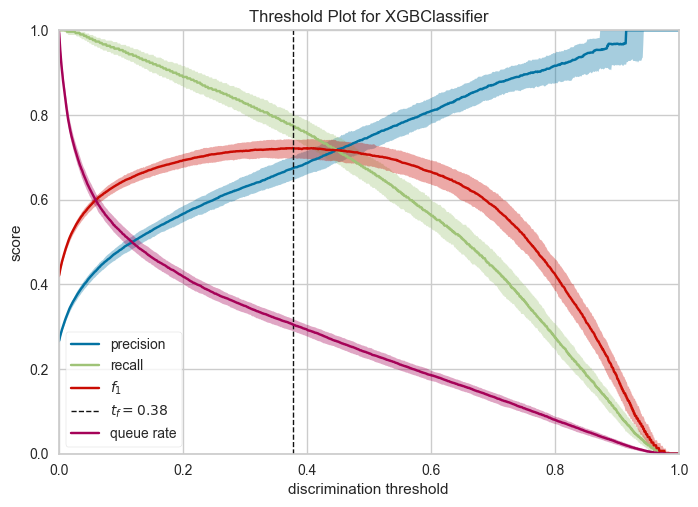

In [25]:
viz = DiscriminationThreshold(best_xgb_pipeline, random_state=42, fbeta=1.0, cv=cv, argmax="fscore")
# Fit et plot
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [45]:
# Probabilités de classe positive
y_proba_xgb = best_xgb_pipeline.predict_proba(X_test)[:, 1]

# Prédiction avec seuil optimal
best_threshold_xgb = 0.38
y_pred_xgb = (y_proba_xgb >= best_threshold_xgb).astype(int)

# Évaluation
logger.info(f"AUC                : {roc_auc_score(y_test, y_proba_xgb):.2f}")
logger.info(f"F1-score           : {f1_score(y_test, y_pred_xgb):.2f}")
logger.info(f"Accuracy           : {accuracy_score(y_test, y_pred_xgb):.2f}")
logger.info(f"Balanced Accuracy  : {balanced_accuracy_score(y_test, y_pred_xgb):.2f}")
logger.info(f"Precision          : {precision_score(y_test, y_pred_xgb):.2f}")
logger.info(f"Recall             : {recall_score(y_test, y_pred_xgb):.2f}")

2025-06-14 16:11:24.846 | INFO     | __main__:<module>:9 - AUC                : 0.91
2025-06-14 16:11:24.851 | INFO     | __main__:<module>:10 - F1-score           : 0.72
2025-06-14 16:11:24.853 | INFO     | __main__:<module>:11 - Accuracy           : 0.84
2025-06-14 16:11:24.857 | INFO     | __main__:<module>:12 - Balanced Accuracy  : 0.82
2025-06-14 16:11:24.862 | INFO     | __main__:<module>:13 - Precision          : 0.68
2025-06-14 16:11:24.866 | INFO     | __main__:<module>:14 - Recall             : 0.78


### Courbe de roc

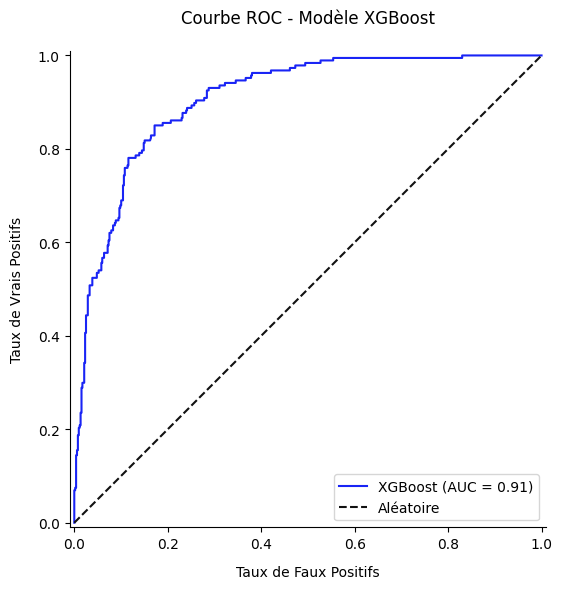

In [65]:
# Calcul des prédictions
y_proba = best_xgb_pipeline.predict_proba(X_test)[:, 1]
y_pred = (y_proba >= 0.38).astype(int)  

plt.figure(figsize=(8, 6))
ax = plt.gca()
RocCurveDisplay.from_estimator(best_xgb_pipeline, X_test, y_test,  name='XGBoost', 
                             color="#1924f5", ax=ax)
plt.plot([0, 1], [0, 1], 'k--', label='Aléatoire')
plt.title('Courbe ROC - Modèle XGBoost', pad=20)
plt.xlabel('Taux de Faux Positifs', labelpad=10)
plt.ylabel('Taux de Vrais Positifs', labelpad=10)
plt.legend(loc='lower right')
sns.despine()
plt.tight_layout()
plt.savefig(Path(MODEL_DIR, 'roc_curve.png'), dpi=300)
plt.show()

### Matrice de confusion 

<Figure size 600x600 with 0 Axes>

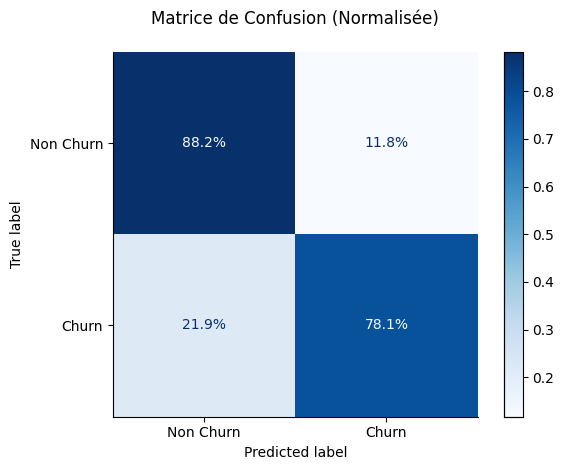

In [72]:
plt.figure(figsize=(6, 6))
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    display_labels=['Non Churn', 'Churn'],
    cmap='Blues',
    normalize='true',
    values_format='.1%'
)
plt.title('Matrice de Confusion (Normalisée)', pad=20)
sns.despine()
plt.tight_layout()
plt.savefig(Path(MODEL_DIR, 'confusion_matrix.png'), dpi=300)
plt.show() 


### Courbe précision recall 

<Figure size 800x600 with 0 Axes>

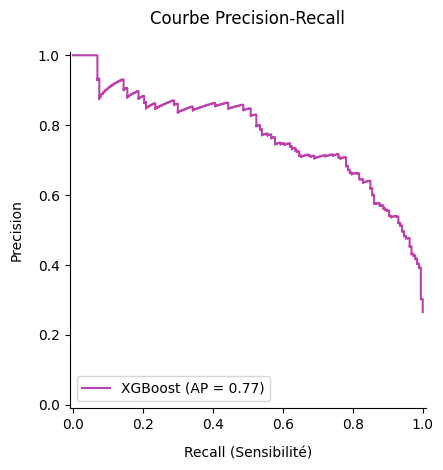

In [74]:
plt.figure(figsize=(8, 6))
PrecisionRecallDisplay.from_estimator(
    best_xgb_pipeline,
    X_test,
    y_test,
    name='XGBoost',
    color="#bd41ac"
)
plt.title('Courbe Precision-Recall', pad=20)
plt.xlabel('Recall (Sensibilité)', labelpad=10)
plt.ylabel('Precision', labelpad=10)
plt.grid(False)
sns.despine()
plt.tight_layout()
plt.savefig(Path(MODEL_DIR, 'precision_recall.png'), dpi=300)
plt.show()

### Courbe de lift

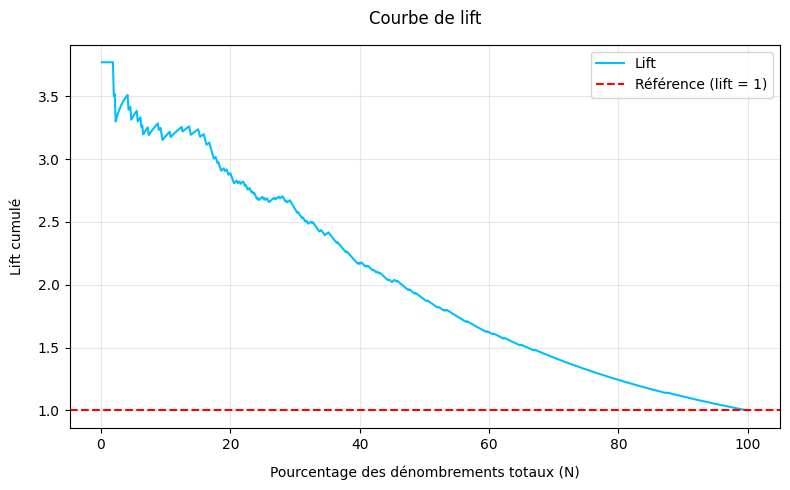

In [79]:
# 1. Obtenir les probabilités de classe positive
y_proba = best_xgb_pipeline.predict_proba(X_test)[:, 1]
y_true = y_test.reset_index(drop=True)

# 2. Créer un DataFrame trié par proba décroissante
df = pd.DataFrame({'y_true': y_true, 'y_proba': y_proba})
df = df.sort_values(by='y_proba', ascending=False).reset_index(drop=True)

# 3. Calcul du taux de churn global
rate_pos = df['y_true'].mean()

# 4. Calcul du lift cumulé
cum_data = df.copy()
cum_data['cum_positive'] = cum_data['y_true'].cumsum()
cum_data['n'] = np.arange(1, len(cum_data) + 1)
cum_data['lift'] = (cum_data['cum_positive'] / cum_data['n']) / rate_pos
cum_data['percentage'] = cum_data['n'] / len(cum_data) * 100

# 5. Tracer la courbe de lift
plt.figure(figsize=(8, 5))
plt.plot(cum_data['percentage'], cum_data['lift'], color='deepskyblue', label='Lift')
plt.axhline(y=1, color='red', linestyle='--', label='Référence (lift = 1)')
plt.xlabel('Pourcentage des dénombrements totaux (N)', labelpad=10)
plt.ylabel('Lift cumulé', labelpad=10)
plt.title('Courbe de lift', pad=15)
plt.legend(loc='upper right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


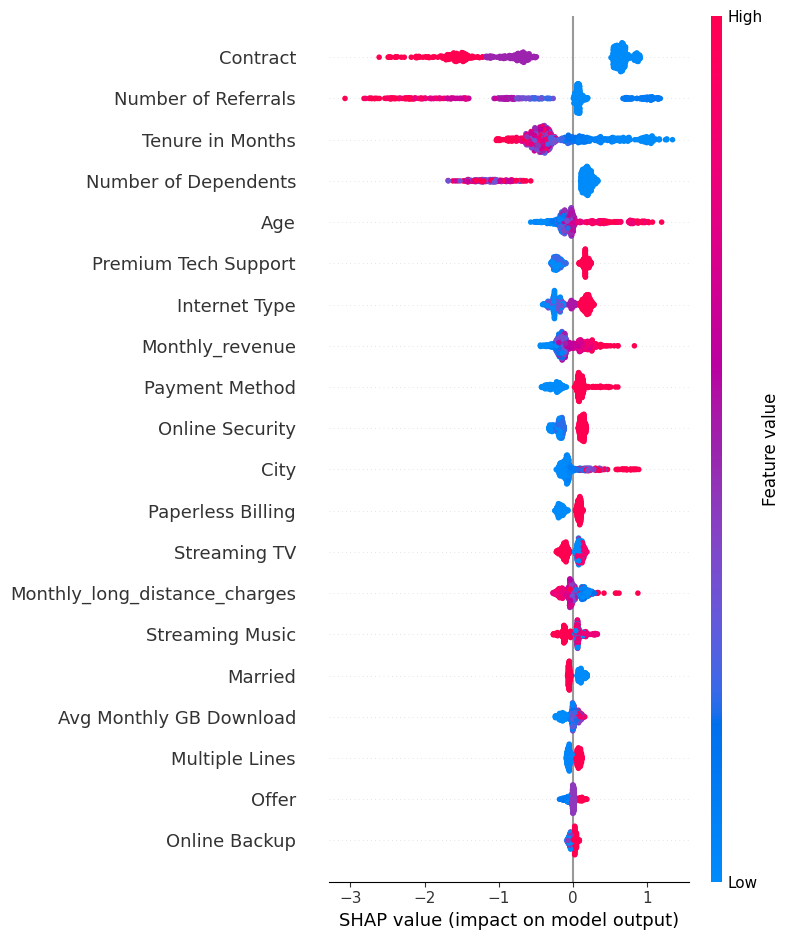

In [ ]:

import shap

# Extraire le modèle XGBoost du pipeline
xgb_model = best_xgb_pipeline.named_steps['clf']

# Transformer X_test avec le préprocesseur
X_test_transformed = best_xgb_pipeline.named_steps['preprocessor'].transform(X_test)

# Créer l'explainer SHAP
explainer = shap.Explainer(xgb_model)

# Calculer les SHAP values
shap_values = explainer(X_test_transformed) 

# Configuration du style sans grille
plt.style.use('default')  # Réinitialiser le style par défaut
plt.rcParams['axes.grid'] = False  # Désactiver la grille 

# Génération du plot avec paramètres personnalisés
fig, ax = plt.subplots(figsize=(10, 6))
shap.summary_plot(
    shap_values, 
    X_test_transformed, 
    feature_names=X_test_transformed.columns,
    show=False  # Ne pas afficher directement
)

# Personnalisation supplémentaire
ax.set_facecolor('white')  # Fond blanc
plt.gcf().set_facecolor('white')  # Fond blanc pour la figure
plt.tight_layout()  # Ajustement automatique

# Affichage final
plt.show()

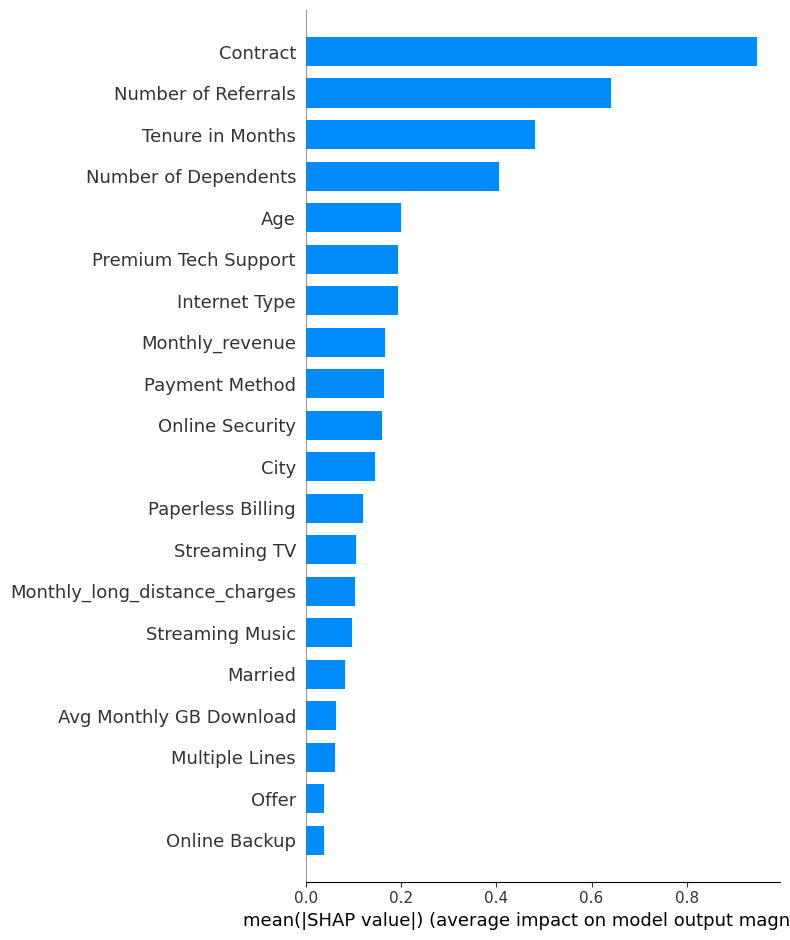

<Figure size 640x480 with 0 Axes>

In [ ]:

shap.summary_plot(shap_values,X_test_transformed,plot_type="bar",show=True)


🔴 Risque élevé — Index 396 — Proba churn : 0.968


<Figure size 1200x400 with 0 Axes>

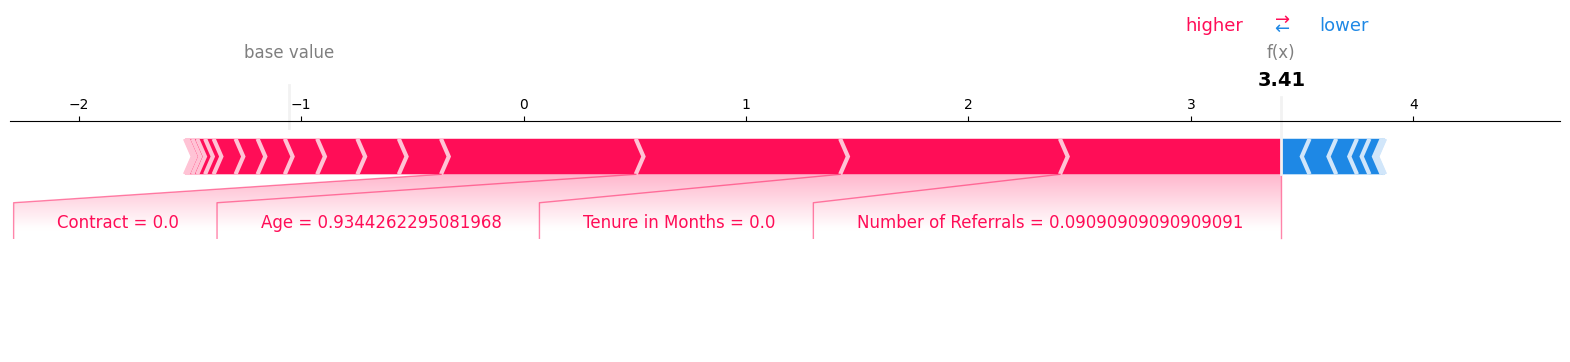

🟡 Risque moyen — Index 87 — Proba churn : 0.501


<Figure size 1200x400 with 0 Axes>

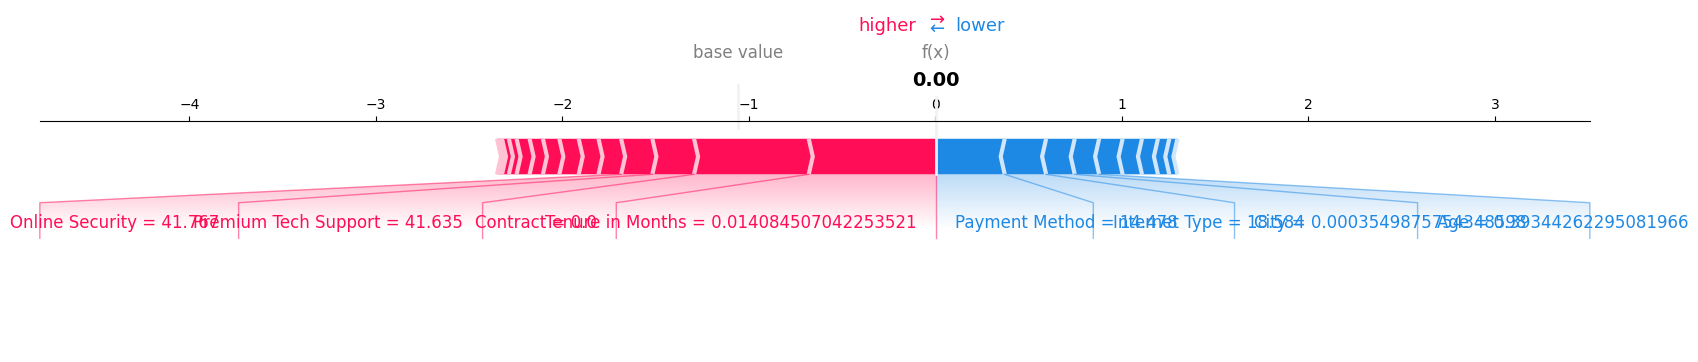

🟢 Risque faible — Index 361 — Proba churn : 0.001


<Figure size 1200x400 with 0 Axes>

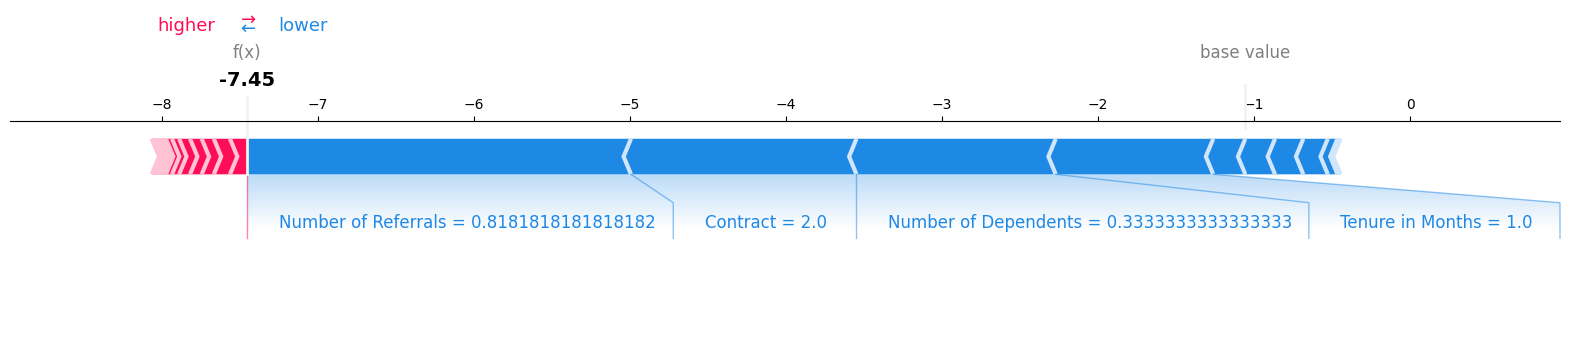

In [61]:
# Probabilités prédites
probas = best_xgb_pipeline.predict_proba(X_test)[:, 1]

# Étape 3 : Sélection de 3 individus représentatifs
high_risk_idx = np.argmax(probas)                           # 🔴 proba la plus élevée
mid_risk_idx = np.argsort(np.abs(probas - 0.5))[0]          # 🟡 proba autour de 0.5
low_risk_idx = np.argmin(probas)                            # 🟢 proba la plus faible

selected_indices = [high_risk_idx, mid_risk_idx, low_risk_idx]
labels = ["🔴 Risque élevé", "🟡 Risque moyen", "🟢 Risque faible"]

# Étape 6 : Affichage des explications locales
for i, idx in enumerate(selected_indices):
    print(f"{labels[i]} — Index {idx} — Proba churn : {probas[idx]:.3f}")
    plt.figure(figsize=(12, 4))
    shap.force_plot(
        explainer.expected_value,
        shap_values[idx].values,
        X_test_transformed.iloc[idx],
        feature_names=X_test_transformed.columns,
        matplotlib=True
    )

## VOTING

In [ ]:
# 1. Récupération directe depuis model_pipelines
best_voting_pipeline = model_pipelines["Voting"]

# 2. Sauvegarde
model_path_name = Path(MODEL_DIR, "best_Voting_model.dill")
with open(model_path_name, "wb") as fp:
    dill.dump(best_voting_pipeline, fp)

print(f"\n VotingClassifier sauvegardé dans : {model_path_name}")



 VotingClassifier sauvegardé dans : models\best_Voting_model.dill
Modèle rechargé avec succès: <class 'sklearn.pipeline.Pipeline'>


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1196, number of negative: 3311
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000470 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 954
[LightGBM] [Info] Number of data points in the train set: 4507, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1196, number of negative: 3311
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000585 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 961
[LightGBM] [Info] Number of data points in the train set: 4507, number of used features:

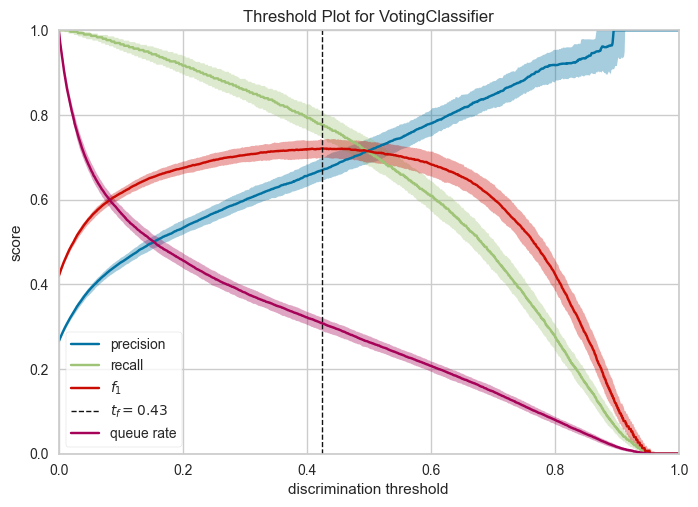

In [49]:
viz = DiscriminationThreshold(best_voting_pipeline, random_state=42, fbeta=1.0, cv=cv, argmax="fscore")
# Fit et plot
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [52]:
best_threshold_voting = 0.44
# Obtenir les probabilités prédites
y_proba_voting = best_voting_pipeline.predict_proba(X_test)[:, 1]
y_pred_voting = (y_proba_voting >= best_threshold_voting).astype(int)

metrics = {
    "AUC": roc_auc_score(y_test, y_proba_voting),
    "F1-score": f1_score(y_test, y_pred_voting),
    "Accuracy": accuracy_score(y_test, y_pred_voting),
    "Balanced Accuracy": balanced_accuracy_score(y_test, y_pred_voting),
    "Precision": precision_score(y_test, y_pred_voting),
    "Recall": recall_score(y_test, y_pred_voting),
    "Optimal Threshold": best_threshold_voting
} 
logger.info(f"\n Métriques VotingClassifier (seuil = {best_threshold_voting:.3f}):")
logger.info(f"AUC                : {metrics['AUC']:.3f}")
logger.info(f"F1-score           : {metrics['F1-score']:.3f}")
logger.info(f"Accuracy           : {metrics['Accuracy']:.3f}")
logger.info(f"Balanced Accuracy  : {metrics['Balanced Accuracy']:.3f}")
logger.info(f"Precision          : {metrics['Precision']:.3f}")
logger.info(f"Recall             : {metrics['Recall']:.3f}")

2025-06-14 17:06:05.250 | INFO     | __main__:<module>:15 - 
 Métriques VotingClassifier (seuil = 0.440):
2025-06-14 17:06:05.251 | INFO     | __main__:<module>:16 - AUC                : 0.908
2025-06-14 17:06:05.251 | INFO     | __main__:<module>:17 - F1-score           : 0.709
2025-06-14 17:06:05.251 | INFO     | __main__:<module>:18 - Accuracy           : 0.834
2025-06-14 17:06:05.252 | INFO     | __main__:<module>:19 - Balanced Accuracy  : 0.811
2025-06-14 17:06:05.252 | INFO     | __main__:<module>:20 - Precision          : 0.663
2025-06-14 17:06:05.253 | INFO     | __main__:<module>:21 - Recall             : 0.762


Ses performances sont moindres par rapport à XGBoost surtout sur la précision et le Recall. Nous allons arréêter notre exploration. 